In [2]:
import pkuseg #北大分词包
import numpy as np
import pandas as pd
import collections
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora, models, similarities
import networkx as nx #复杂网络分析库
import os



import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
import graphviz
import copy
import re

C:\Users\X1Yoga2018\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
C:\Users\X1Yoga2018\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
C:\Users\X1Yoga2018\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [3]:
# path = 'C:/Users/X1Yoga2018/Desktop/LDA/text/' #C:\Users\X1Yoga2018\Desktop\LDA\text\
# fn = open(path + '“十四五”节能减排综合工作方案.txt' ,'r', encoding='utf-8')
# string_data = fn.read()
# fn.close()

path = "C:/Users/X1Yoga2018/Desktop/LDA/text/" #文件夹目录
files= os.listdir(path) #得到文件夹下的所有文件名称
txts = []
for file in files: #遍历文件夹
    position = path+'\\'+ file #构造绝对路径，"\\"，其中一个'\'为转义符
    # print (position)           
    with open(position, "r",encoding='utf-8') as f:    #打开文件
        data = f.read()   #读取文件
        txts.append(data)
string_data = ','.join(txts)#转化为非数组类型  
print (string_data)

2030年前碳达峰行动方案
　　
　　为深入贯彻落实党中央、国务院关于碳达峰、碳中和的重大战略决策，扎实推进碳达峰行动，制定本方案。
　　一、总体要求
　　（一）指导思想。以习近平新时代中国特色社会主义思想为指导，全面贯彻党的十九大和十九届二中、三中、四中、五中全会精神，深入贯彻习近平生态文明思想，立足新发展阶段，完整、准确、全面贯彻新发展理念，构建新发展格局，坚持系统观念，处理好发展和减排、整体和局部、短期和中长期的关系，统筹稳增长和调结构，把碳达峰、碳中和纳入经济社会发展全局，坚持“全国统筹、节约优先、双轮驱动、内外畅通、防范风险”的总方针，有力有序有效做好碳达峰工作，明确各地区、各领域、各行业目标任务，加快实现生产生活方式绿色变革，推动经济社会发展建立在资源高效利用和绿色低碳发展的基础之上，确保如期实现2030年前碳达峰目标。
　　（二）工作原则。
　　——总体部署、分类施策。坚持全国一盘棋，强化顶层设计和各方统筹。各地区、各领域、各行业因地制宜、分类施策，明确既符合自身实际又满足总体要求的目标任务。
　　——系统推进、重点突破。全面准确认识碳达峰行动对经济社会发展的深远影响，加强政策的系统性、协同性。抓住主要矛盾和矛盾的主要方面，推动重点领域、重点行业和有条件的地方率先达峰。
　　——双轮驱动、两手发力。更好发挥政府作用，构建新型举国体制，充分发挥市场机制作用，大力推进绿色低碳科技创新，深化能源和相关领域改革，形成有效激励约束机制。
　　——稳妥有序、安全降碳。立足我国富煤贫油少气的能源资源禀赋，坚持先立后破，稳住存量，拓展增量，以保障国家能源安全和经济发展为底线，争取时间实现新能源的逐渐替代，推动能源低碳转型平稳过渡，切实保障国家能源安全、产业链供应链安全、粮食安全和群众正常生产生活，着力化解各类风险隐患，防止过度反应，稳妥有序、循序渐进推进碳达峰行动，确保安全降碳。
　　二、主要目标
　　“十四五”期间，产业结构和能源结构调整优化取得明显进展，重点行业能源利用效率大幅提升，煤炭消费增长得到严格控制，新型电力系统加快构建，绿色低碳技术研发和推广应用取得新进展，绿色生产生活方式得到普遍推行，有利于绿色低碳循环发展的政策体系进一步完善。到2025年，非化石能源消费比重达到20%左右，单位国内生产总值能源消耗比2020年下降13.5%，单位国内生产总值二氧化碳排

In [4]:
pattern = re.compile(u'\t|\）|—|：|。|\)|\(|\?|，|“|”|（|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

<>:1: DeprecationWarning: invalid escape sequence \)
<>:1: DeprecationWarning: invalid escape sequence \)
C:\Users\X1YOGA~1\AppData\Local\Temp/ipykernel_28296/4217472837.py:1: DeprecationWarning: invalid escape sequence \)
  pattern = re.compile(u'\t|\）|—|：|。|\)|\(|\?|，|“|”|（|"') # 定义正则表达式匹配模式


In [5]:
seg = pkuseg.pkuseg(postag=False)  # 开启词性标注功能
seg_list_exact = seg.cut(string_data)    # 进行分词和词性标注
object_list = []
remove_words = [] 
with open(path + 'stop_words.txt', 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    for line in lines:
        remove_words.append(line.strip())
my_remove_words = ['发展','重点','推进','实施','环境部','加快','完善','推动','支持','利用','年内','建立','负责','分工','职责','提升','管理','生态']
remove_words = remove_words + my_remove_words
# with open('stop_words.txt','r',encoding='utf-8') as file2: 
#     remove_words="".join(file2.readlines()) ####【设置停用词】
for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words and word.__len__()>1: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表



In [6]:
num = 20
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top = word_counts.most_common(num) # 获取最高频的词
word = pd.DataFrame(word_counts_top, columns=['关键词','次数'])

In [7]:
print(word)
word.to_csv('output.csv')

   关键词    次数
0   能源  1095
1   绿色   476
2   建设   412
3   国家   380
4   技术   362
5   低碳   288
6   企业   261
7   持续   256
8   体系   228
9   机制   206
10  节能   204
11  市场   201
12  资源   192
13  政策   192
14  光伏   181
15  创新   176
16  地区   165
17  电力   165
18  产业   160
19  清洁   155


In [74]:
word_T = pd.DataFrame(word.values.T,columns=word.iloc[:,0])
net = pd.DataFrame(np.mat(np.zeros((num,num))),columns=word.iloc[:,0])
k = 0


In [75]:
for i in range(len(string_data)):    
    if string_data[i] == '\n':  #根据换行符读取一段文字        
        seg_list_exact = seg.cut(string_data[k:i]) # 精确模式分词        
object_list2 = []        
for words in seg_list_exact: # 循环读出每个分词            
    if words not in remove_words and words.__len__()>1: # 如果不在去除词库中         
        object_list2.append(words) # 分词追加到列表


In [76]:
word_counts2 = collections.Counter(object_list2)
word_counts_top2 = word_counts2.most_common(num) # 获取该段最高频的词
word2 = pd.DataFrame(word_counts_top2)
word2_T = pd.DataFrame(word2.values.T,columns=word2.iloc[:,0])
relation = list(0 for x in range(num))

In [77]:
print(relation)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
print(net)

NameError: name 'net' is not defined

In [78]:
for j in range(num):    
    for p in range(len(word2)):        
        if word.iloc[j,0] == word2.iloc[p,0]:            
            relation[j] = 1            
            break        


In [79]:
for j in range(num):    
    if relation[j] == 1:        
        for q in range(num):            
            if relation[q] == 1:                
                net.iloc[j, q] = net.iloc[j, q] + word2_T.loc[1, word_T.iloc[0, q]]    
                k = i + 1      


In [114]:
G = nx.Graph()
n = len(word) 
for i in range(n):    
    for j in range(i+1, n):  #去除重复      
        G.add_weighted_edges_from([(word.iloc[i, 0], word.iloc[j, 0], net.iloc[i, j])])

for i in range(n):
    G.add_nodes_from([(word.iloc[i, 0])])

print(G.edges())



[('能源', '绿色'), ('能源', '建设'), ('能源', '国家'), ('能源', '技术'), ('能源', '低碳'), ('能源', '企业'), ('能源', '持续'), ('能源', '体系'), ('能源', '机制'), ('能源', '节能'), ('能源', '市场'), ('能源', '资源'), ('能源', '政策'), ('能源', '光伏'), ('能源', '创新'), ('能源', '地区'), ('能源', '电力'), ('能源', '产业'), ('能源', '清洁'), ('绿色', '建设'), ('绿色', '国家'), ('绿色', '技术'), ('绿色', '低碳'), ('绿色', '企业'), ('绿色', '持续'), ('绿色', '体系'), ('绿色', '机制'), ('绿色', '节能'), ('绿色', '市场'), ('绿色', '资源'), ('绿色', '政策'), ('绿色', '光伏'), ('绿色', '创新'), ('绿色', '地区'), ('绿色', '电力'), ('绿色', '产业'), ('绿色', '清洁'), ('建设', '国家'), ('建设', '技术'), ('建设', '低碳'), ('建设', '企业'), ('建设', '持续'), ('建设', '体系'), ('建设', '机制'), ('建设', '节能'), ('建设', '市场'), ('建设', '资源'), ('建设', '政策'), ('建设', '光伏'), ('建设', '创新'), ('建设', '地区'), ('建设', '电力'), ('建设', '产业'), ('建设', '清洁'), ('国家', '技术'), ('国家', '低碳'), ('国家', '企业'), ('国家', '持续'), ('国家', '体系'), ('国家', '机制'), ('国家', '节能'), ('国家', '市场'), ('国家', '资源'), ('国家', '政策'), ('国家', '光伏'), ('国家', '创新'), ('国家', '地区'), ('国家', '电力'), ('国家', '产业'), ('国家', '清洁'), ('技术', '低碳'), ('技术'

(-0.09917418929748237,
 1.0692438854929058,
 -0.007601670473814021,
 0.9744713078439237)

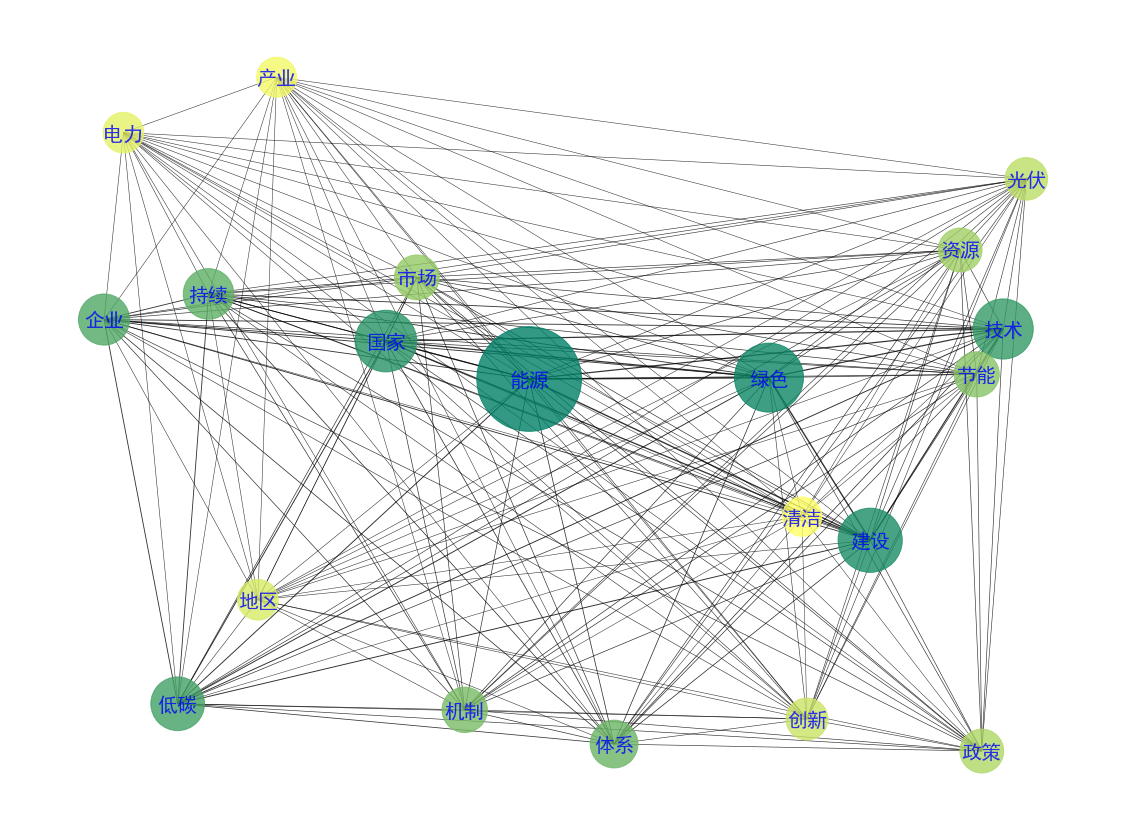

In [136]:

plt.figure(figsize=(20,15))
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
pos=nx.random_layout(G)
pos_shadow = copy.deepcopy(pos)
nx.draw_networkx(G, pos_shadow, width=[float(v['weight'] /300) for (r, c, v) in G.edges(data=True)], edge_color='k', alpha=0.8,node_size=[float(net.iloc[i, i] * 10) for i in np.arange(20)],node_color = range(20),font_color='blue',font_size=20,cmap = plt.cm.summer)
plt.axis('off')




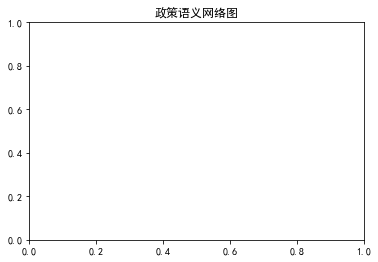

In [139]:
plt.title('政策语义网络图',fontstyle='oblique')
plt.savefig('语义.png')
plt.show()